In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd "/home/volkan/Repos/multi-tier"
from data_analysis.helpers import *


/home/volkan/Repos/multi-tier


In [2]:
import json


def query_json_db(db_file, parameter_filters):
    """
    Queries a JSON database for entries matching specific parameters.

    Args:
        db_file (str): Path to the JSON database file.
        parameter_filters (dict): Dictionary containing parameter filters,
                                 where keys are parameter names and values are
                                 the desired values.

    Returns:
        tuple: A tuple containing:
            - dict: A dictionary of matching entries (keys are entry IDs, values are data).
            - list: A list of matching entry IDs.
    """

    with open(db_file, "r") as file:
        db_data = json.load(file)

    matching_entries_dict = {}
    matching_entries_params = []

    for entry_id, entry_data in db_data.items():
        if "parameters" in entry_data:
            parameters = entry_data["parameters"]
            if all(
                (
                    parameters.get(param) == value
                    if isinstance(value, (int, float))
                    else parameters.get(param) in value
                )
                for param, value in parameter_filters.items()
            ):
                matching_entries_dict[entry_id] = entry_data
                matching_entries_params.append(parameters)  # Store the matching ID

    return matching_entries_dict, matching_entries_params

# REQ RATE

In [ ]:
topology = "geant"
db_file = f'sim_outputs/mt_req_vipfifounif_{topology}_db.json'
fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25,27.5,30]

request_dist_param = 0.75
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,200]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO", fillstyle="none")

db_file = f'sim_outputs/mt_req_lrulfu_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,50]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,25]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU", fillstyle="none")

db_file = f'sim_outputs/st_req_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--r^", label="VIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--bs", label="LFU (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--gx", label="LRU (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--yo", label="UNIF (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--md", label="FIFO (single-tier)", fillstyle="none")


ax.legend(fontsize=14)
handles, labels = ax.get_legend_handles_labels()
order = [0,3,4,2,1,5,6,7,9,8]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=14,ncols=2,columnspacing=0.8)
#ax.legend([ "MVIP", "LFU", "LRU", "UNIF", "FIFO"],fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Request rate (per sec, per node)",fontsize=15)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/mt_req_{topology}_delay.pdf", bbox_inches='tight')

## REQ RATE - HITS

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_req_{topology}_db.json'

fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25]

request_dist_param = 0.75

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,150]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-r^", label="MVIP (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--r^", label="MVIP (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,100]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-ks", label="LFU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--ks", label="LFU (second tier)", fillstyle="none")

ax.legend(fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.25))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total cache hits",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
#request_rate_str = str(request_rate)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

## ZIPF PARAM

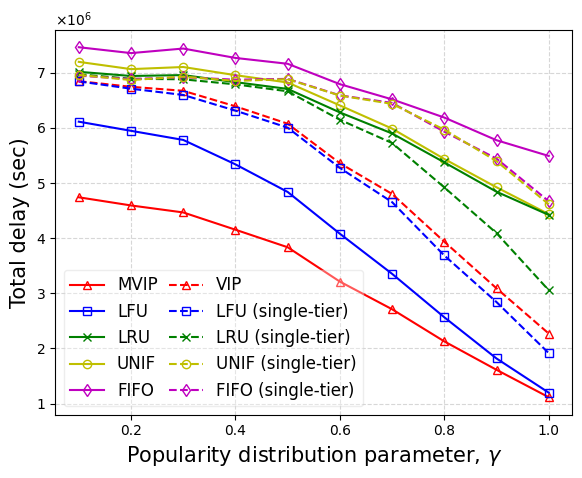

In [78]:
topology="geant"
db_file = f'sim_outputs/mt_zipf_vipfifounif_{topology}_db.json'
fig, ax = plt.subplots()
x_axis = np.linspace(0.1, 1.0, 10, endpoint=True)

request_rate = 15
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip"
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF", fillstyle="none")

db_file = f'sim_outputs/mt_zipf_lrulfu_{topology}_db.json'

parameter_filters["cache_capacities"] = [[5,50]]
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU", fillstyle="none")

parameter_filters["cache_capacities"] = [[5,25]]
parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU", fillstyle="none")

db_file = f'sim_outputs/st_zipf_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2"
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--r^", label="VIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--bs", label="LFU (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--gx", label="LRU (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--md", label="FIFO (single-tier)", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--yo", label="UNIF (single-tier)", fillstyle="none")

handles, labels = ax.get_legend_handles_labels()
order = [0,3,4,2,1,5,6,7,9,8]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncols=2,fontsize=12,columnspacing=0.7,framealpha=0.35)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Popularity distribution parameter, $\gamma$",fontsize=15)
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/zipf_{topology}_{request_rate_str}_delay.pdf", bbox_inches='tight')

# PENALTY

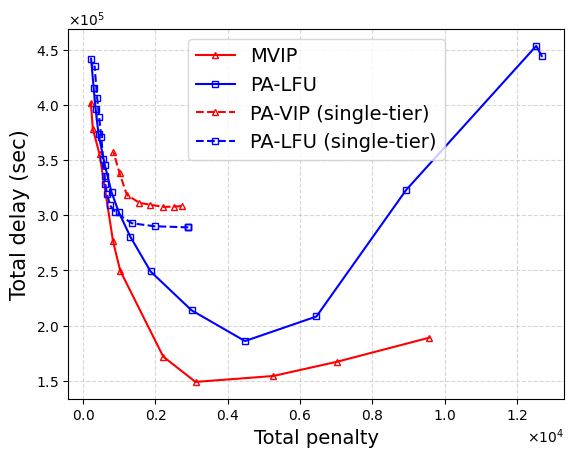

In [158]:
topology = "abilene"
db_file = f'sim_outputs/mt_pen_vip_{topology}_db.json'
#db_file = f'sim_outputs/mt_pen_{topology}_db.json'
fig, ax = plt.subplots()

request_dist_param = 0.75

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "vip_slot_len": 4,
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,200]]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-r^", label="MVIP", fillstyle="none", markersize=5)

db_file = f'sim_outputs/mt_pen_palfu_{topology}_db.json'
#db_file = f'sim_outputs/mt_pen_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,200]]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-bs", label="PA-LFU", fillstyle="none", markersize=5)

db_file = f'sim_outputs/st_pen_vip_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
    "vip_slot_len": 4,
    "cache_capacities": [[13]]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen[:-2], res[:-2], "--r^", label="PA-VIP (single-tier)", fillstyle="none", markersize=5)

db_file = f'sim_outputs/st_pen_palfu_{topology}_db.json'
parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "palfu"
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--bs", label="PA-LFU (single-tier)", fillstyle="none", markersize=5)

ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Total penalty",fontsize=14)
ax.legend(fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useMathText=True)
#fig.savefig(f"sim_outputs/mt_pen_{topology}_{request_rate_str}_{request_dist_param_str}.pdf", bbox_inches='tight')

## CACHE SIZE - DELAY

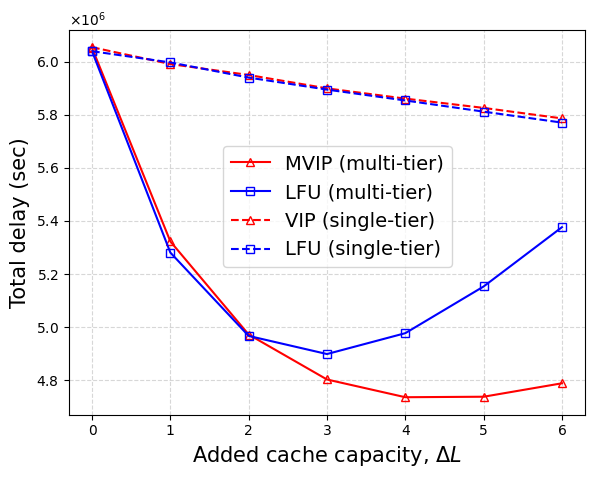

In [32]:
topology="geant"
db_file = f'sim_outputs/mt_size_ia_{topology}_db.json'
fig, ax = plt.subplots()
x_axis = list(range(7))
request_dist_param = 0.75
request_rate = 50

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU", fillstyle="none")

""" parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF", fillstyle="none") """

db_file = f'sim_outputs/st_size_ia_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--r^", label="VIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis,  res, "--bs", label="LFU", fillstyle="none")

""" parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis,  res, "--gx", label="LRU", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis,  res, "--md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis,  res, "--yo", label="UNIF", fillstyle="none") """

""" import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["Multi-tier", "Single-tier"],ncols=2,fontsize=13,loc="upper center",bbox_to_anchor=(0.5,1.15))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
leg2 = ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13, loc="right", bbox_to_anchor=(1.25,0.5))
ax.add_artist(leg2) """

ax.legend(["MVIP (multi-tier)", "LFU (multi-tier)", "VIP (single-tier)", "LFU (single-tier)"],fontsize=14,loc="center",bbox_to_anchor=(0.52, 0.54))
#ax.legend()
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_geant_all_075_15.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
#fig.savefig(f"sim_outputs/size_comp_ia_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')

## CACHE SIZE - HITS / REPLACEMENTS

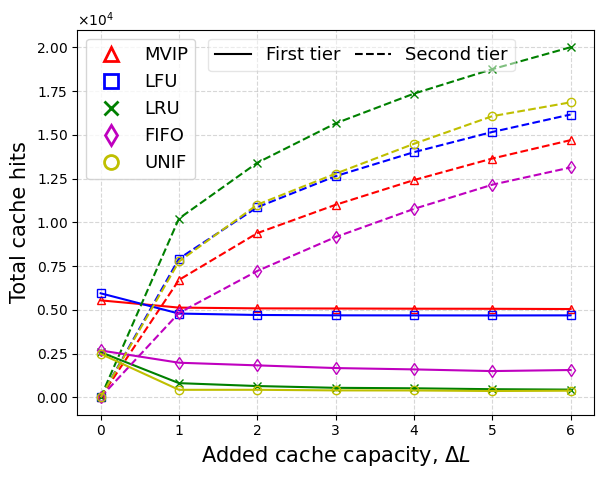

In [42]:
topology="abilene"
metric="response_counts"

fig, ax = plt.subplots()

x_axis = list(range(7))
cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150]]

request_dist_param = 0.75
request_rate = 50

db_file = f'sim_outputs/mt_size_ia_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, res = np.hsplit(res, 2)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, _, tmp = np.hsplit(tmp, 3)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-r^", label="MVIP (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--r^", label="MVIP (second tier)", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
parameter_filters["cache_capacities"] = cache_capacities
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, res = np.hsplit(res, 2)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, _, tmp = np.hsplit(tmp, 3)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-bs", label="LFU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--bs", label="LFU (second tier)", fillstyle="none")

parameter_filters["cache_pol"] = "lru"
parameter_filters["cache_capacities"] = cache_capacities
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, res = np.hsplit(res, 2)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, _, tmp = np.hsplit(tmp, 3)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-gx", label="LRU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--gx", label="LRU (second tier)", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
parameter_filters["cache_capacities"] = cache_capacities
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, res = np.hsplit(res, 2)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, _, tmp = np.hsplit(tmp, 3)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-md", label="FIFO (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--md", label="FIFO (second tier)", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
parameter_filters["cache_capacities"] = cache_capacities
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, res = np.hsplit(res, 2)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
_, _, tmp = np.hsplit(tmp, 3)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-yo", label="UNIF (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--yo", label="UNIF (second tier)", fillstyle="none")

#ax.legend()
#handles, labels = ax.get_legend_handles_labels()
#order = [0,2,4,6,8,1,3,5,7,9]
#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.5))
import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["First tier", "Second tier"],ncols=2,fontsize=13,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.55,1.0),framealpha=0.5)
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total cache hits",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_ia_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

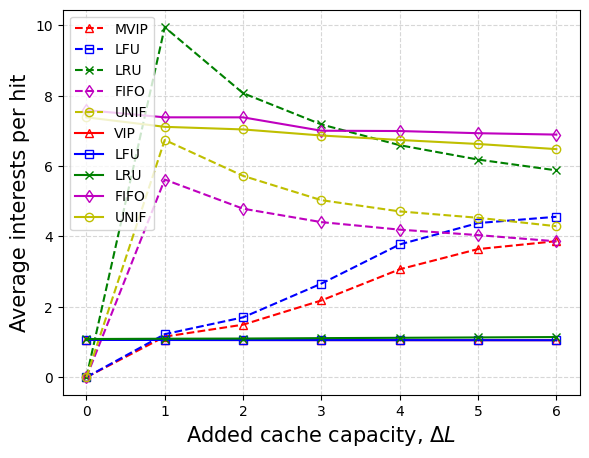

In [68]:
topology="abilene"

fig, ax = plt.subplots()

x_axis = list(range(7))
cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150]]

request_dist_param = 0.75
request_rate = 50

db_file = f'sim_outputs/mt_size_ia_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, _, res = np.hsplit(res, 4)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, res2 = np.hsplit(res2, 2)
res, res2 = res.flatten(), res2.flatten()
res = res/res2
res = [0] + res.tolist()
ax.plot(x_axis, res, "--r^", label="MVIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, _, res = np.hsplit(res, 4)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, res2 = np.hsplit(res2, 2)
res, res2 = res.flatten(), res2.flatten()
res = res/res2
res = [0] + res.tolist()
ax.plot(x_axis, res, "--bs", label="LFU", fillstyle="none")

parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, _, res = np.hsplit(res, 4)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, res2 = np.hsplit(res2, 2)
res, res2 = res.flatten(), res2.flatten()
res = res/res2
res = [0] + res.tolist()
ax.plot(x_axis, res, "--gx", label="LRU", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, _, res = np.hsplit(res, 4)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, res2 = np.hsplit(res2, 2)
res, res2 = res.flatten(), res2.flatten()
res = res/res2
res = [0] + res.tolist()
ax.plot(x_axis, res, "--md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, _, res = np.hsplit(res, 4)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, res2 = np.hsplit(res2, 2)
res, res2 = res.flatten(), res2.flatten()
res = res/res2
res = [0] + res.tolist()
ax.plot(x_axis, res, "--yo", label="UNIF", fillstyle="none")

db_file = f'sim_outputs/st_size_ia_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, res = np.hsplit(res, 3)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res, res2 = res.flatten(), res2.flatten()
res = res/res2
ax.plot(x_axis, res, "-r^", label="VIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, res = np.hsplit(res, 3)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res, res2 = res.flatten(), res2.flatten()
res = res/res2
ax.plot(x_axis, res, "-bs", label="LFU", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, res = np.hsplit(res, 3)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res, res2 = res.flatten(), res2.flatten()
res = res/res2
ax.plot(x_axis, res, "-gx", label="LRU", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, res = np.hsplit(res, 3)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res, res2 = res.flatten(), res2.flatten()
res = res/res2
ax.plot(x_axis, res, "-md", label="FIFO", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "response_counts")
_, _, res = np.hsplit(res, 3)
res2 = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res, res2 = res.flatten(), res2.flatten()
res = res/res2
ax.plot(x_axis, res, "-yo", label="UNIF", fillstyle="none")

ax.legend()
#handles, labels = ax.get_legend_handles_labels()
#order = [0,2,4,6,8,1,3,5,7,9]
#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.5))
""" import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["First tier", "Second tier"],ncols=2,fontsize=13,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.55,1.0),framealpha=0.5)
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13) """
ax.grid(linestyle="--",alpha=0.5)
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Average interests per hit",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_ia_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

## CACHE SIZE - HIT DELAYS

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

fig, ax = plt.subplots()

if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
cache_hits = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(cache_hits, 2)
cache_replacements = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(cache_replacements, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--r^", label="MVIP (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--r^", label="MVIP", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--ks", label="LFU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--bs", label="LFU", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--gx", label="LRU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--gx", label="LRU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--md", label="FIFO (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--md", label="FIFO", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--yo", label="UNIF (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--yo", label="UNIF", fillstyle="none")

##############################TOTAL DELAY#########################################
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'
if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU (total delay)", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (total delay)", fillstyle="none")

#ax.legend(fontsize=14,ncol=2,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.5, 1.35))

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["First tier", "Second tier"],fontsize=14,loc="right",bbox_to_anchor=(0.65,0.89))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)

ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Second tier read delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hit_delays.pdf", bbox_inches='tight')

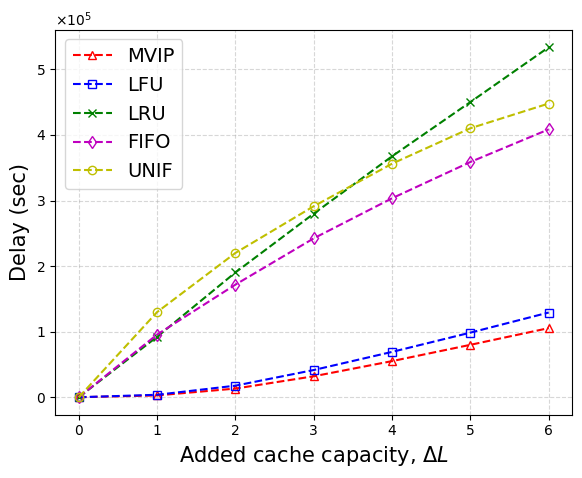

In [49]:
topology="abilene"
db_file = f'sim_outputs/mt_size_ia_{topology}_db.json'

fig, ax = plt.subplots()

x_axis = list(range(7))
cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150]]

request_dist_param = 0.75
request_rate = 50

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
cache_hits = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(cache_hits, 2)
cache_replacements = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(cache_replacements, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--r^", label="MVIP (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--r^", label="MVIP", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--ks", label="LFU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--bs", label="LFU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--gx", label="LRU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--gx", label="LRU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--md", label="FIFO (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--md", label="FIFO", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--yo", label="UNIF (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--yo", label="UNIF", fillstyle="none")

##############################TOTAL DELAY#########################################
""" x_axis = list(range(7))
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (total delay)", fillstyle="none") """

#ax.legend(fontsize=14,ncol=2,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.5, 1.35))
ax.legend(fontsize=14)
""" import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["Total delay", "Second tier hit delay"],ncols=2,fontsize=13,loc="upper center",bbox_to_anchor=(0.5,1.15))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
leg2 = ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13, loc="right", bbox_to_anchor=(1.25,0.5))
ax.add_artist(leg2) """
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hit_delays.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')

## CACHE SIZE - BASELINES

In [ ]:
topology="abilene"
db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
fig, ax = plt.subplots()
#x_axis = np.linspace(0, 100, 11, endpoint=True)
x_axis = list(range(6))
#x_axis = np.linspace(0, 50, 11, endpoint=True)
request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (multi-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (multi-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (multi-tier)", fillstyle="none")

db_file = f'sim_outputs/nocache_{topology}_db.json'
parameter_filters = {
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
res = [res[0]] * len(x_axis)
ax.plot(x_axis, res, ":k", label="No caching", linewidth=2)

db_file = f'sim_outputs/st_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--gx", label="LRU (single-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--md", label="FIFO (single-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--yo", label="UNIF (single-tier)", fillstyle="none")


ax.legend(fontsize=13,ncols=2)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/size_comp_baselines_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')

## MORE TOPOLOGIES

In [3]:
def alltops(topology, request_dist_param, request_rate):
    db_file = f'sim_outputs/nocache_{topology}_db.json'

    parameter_filters = {
        "request_dist_param": request_dist_param,
        "request_rate": request_rate,
    }
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    nocache = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    assert len(nocache) == 1
    nocache = nocache[0]

    #db_file = f'sim_outputs/mt_alltops_baselines_{topology}_db.json'
    db_file = f'sim_outputs/alltops_{topology}_db.json'
    parameter_filters = {
        "cache_pol": "lfu",
        "request_dist_param": request_dist_param,
        "request_rate": request_rate,
    }
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    lfu = 1 - res/nocache

    parameter_filters["cache_pol"] = "lru"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    lru = 1 - res/nocache

    parameter_filters["cache_pol"] = "fifo"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    fifo = 1 - res/nocache

    parameter_filters["cache_pol"] = "unif"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    unif = 1 - res/nocache

    #db_file = f'sim_outputs/mt_alltops_vip_{topology}_db.json'

    parameter_filters["cache_pol"] = "mvip"
    #parameter_filters["vip_slot_len"] = 1
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    mvip = 1 - res/nocache

    return (np.argmax(fifo),np.argmax(unif),np.argmax(lru),np.argmax(lfu),np.argmax(mvip)), (max(fifo),max(unif),max(lru),max(lfu),max(mvip))

In [4]:
data = {(0.75,15): {}, (0.75,30): {}, (0.5,15): {}, (0.5,30): {}}
for topology in ["ndise-mp", "abilene", "grid", "geant", "regular", "balanced", "watts", "erdos"]:
    data[(0.75,15)][topology] = alltops(topology,0.75,15)
    data[(0.75,30)][topology] = alltops(topology,0.75,30)
    data[(0.5,15)][topology] = alltops(topology,0.5,15)
    data[(0.5,30)][topology] = alltops(topology,0.5,30)

In [28]:
pols = ["FIFO", "UNIF", "LRU", "LFU", "MVIP"]
for i,pol in enumerate(pols):
    l1 = []
    l2 = []
    for topology in ["ndise-mp", "abilene", "grid", "geant", "regular", "balanced", "watts", "erdos"]:
        x = data[(0.5,15)][topology][0][i]
        l1.append(13 - x)
        l2.append(25*x)
    print(f"\\textbf{{{pol}}} & "+f"({l1[0]},{l2[0]}) & ({l1[1]},{l2[1]}) & ({l1[2]},{l2[2]}) & ({l1[3]},{l2[3]}) & ({l1[4]},{l2[4]}) & ({l1[5]},{l2[5]}) & ({l1[6]},{l2[6]}) & ({l1[7]},{l2[7]}) \\\\ \\hline") 

\textbf{FIFO} & (9,100) & (13,0) & (13,0) & (13,0) & (13,0) & (5,200) & (5,200) & (13,0) \\ \hline
\textbf{UNIF} & (5,200) & (13,0) & (13,0) & (5,200) & (13,0) & (5,200) & (5,200) & (13,0) \\ \hline
\textbf{LRU} & (12,25) & (13,0) & (13,0) & (12,25) & (13,0) & (6,175) & (5,200) & (13,0) \\ \hline
\textbf{LFU} & (6,175) & (10,75) & (11,50) & (9,100) & (11,50) & (5,200) & (5,200) & (12,25) \\ \hline
\textbf{MVIP} & (5,200) & (6,175) & (8,125) & (5,200) & (6,175) & (5,200) & (5,200) & (10,75) \\ \hline


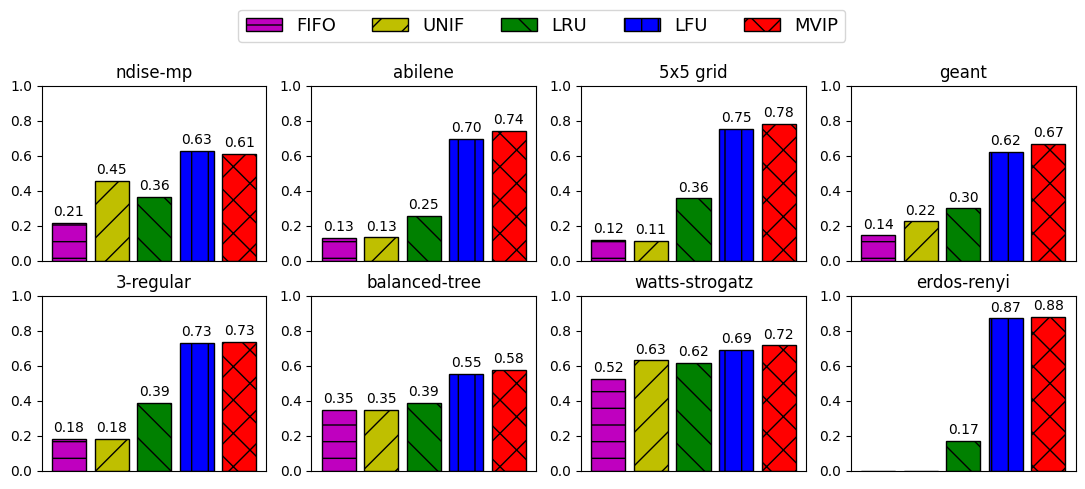

In [198]:
colors = ["m", "y", "g", "b", "r"]
hatches = ["-", "/", "\\", "|", "x"]
labels = ["FIFO", "UNIF", "LRU", "LFU", "MVIP"]
top_name_map = {"ndise-mp": "ndise-mp", "abilene": "abilene", "geant": "geant", "balanced": "balanced-tree", "watts": "watts-strogatz", "grid": "5x5 grid", "regular": "3-regular", "erdos": "erdos-renyi"}
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,6))
request_rate = 15
request_rate_str = str(request_rate)
request_dist_param = 0.75
request_dist_param_str = str(request_dist_param).replace(".","")
i = 0
for topology in ["ndise-mp", "abilene", "grid", "geant", "regular", "balanced", "watts", "erdos"]:
    r = i // 4
    c = i % 4
    values = data[(request_dist_param,request_rate)][topology][1]
    # Create the bar chart
    bars = ax[r,c].bar(range(5), values, color=colors, hatch=hatches, edgecolor="black")

    # Add the bar labels (values)
    for bar in bars:
        height = bar.get_height()
        ax[r,c].annotate(f'{height:.2f}',  # Format to two decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    ax[r,c].set_ylim([0,1])
    ax[r,c].get_xaxis().set_visible(False)
    ax[r,c].set_title(top_name_map[topology])
    i += 1
fig.set_size_inches(13.34,5)

import matplotlib.patches as mpatches
legend_elements = []
for color, hatch, label in zip(colors, hatches, labels):
    legend_elements.append(
        mpatches.Patch(
            facecolor=color, 
            hatch=hatch, 
            edgecolor="black", 
            label=label
        )
    )
fig.legend(handles=legend_elements, fontsize=13, loc="upper center", ncol=5, bbox_to_anchor=(0.5,1.05))
fig.savefig(f"sim_outputs/alltops_{request_dist_param_str}_{request_rate_str}.pdf", bbox_inches='tight')

## AGGREGATION

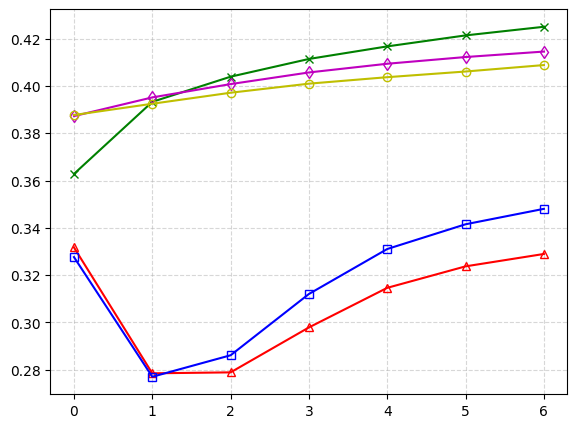

In [24]:
topology="abilene"
db_file = f'sim_outputs/mt_size_ia_{topology}_db.json'
fig, ax = plt.subplots()

request_dist_param = 0.75
request_rate = 50

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
param_hash_list = getParamHashList(param_list)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "rx_interests")
agg = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "agg_interests")
ax.plot(range(len(res)), agg/res, "-r^", label="MVIP", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lfu"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
param_hash_list = getParamHashList(param_list)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "rx_interests")
agg = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "agg_interests")
ax.plot(range(len(res)), agg/res, "-bs", label="LFU", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
param_hash_list = getParamHashList(param_list)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "rx_interests")
agg = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "agg_interests")
ax.plot(range(len(res)), agg/res, "-gx", label="LRU", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
param_hash_list = getParamHashList(param_list)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "rx_interests")
agg = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "agg_interests")
ax.plot(range(len(res)), agg/res, "-md", label="FIFO", fillstyle="none")

parameter_filters["fwd_pol"] = "lrt"
parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
param_hash_list = getParamHashList(param_list)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "rx_interests")
agg = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "agg_interests")
ax.plot(range(len(res)), agg/res, "-yo", label="UNIF", fillstyle="none")


ax.grid(linestyle="--",alpha=0.5)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_geant_all_075_15.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')